In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the dataset
df = pd.read_csv("2_shopping_trends.csv")
df

,Age,Gender,Item Purchased,Category,Location,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Purchase Intent Category
0,33,Male,Backpack,Accessories,Malaysia,Summer,4.5,Yes,Yes,44,Fortnightly,Wants-based
1,39,Female,Jeans,Clothing,Spain,Winter,5.0,No,No,23,Fortnightly,Wants-based
2,23,Male,Dress,Clothing,Australia,Spring,3.2,No,No,30,Weekly,Wants-based
3,39,Male,Backpack,Accessories,United Kingdom,Fall,3.1,Yes,Yes,19,Weekly,Wants-based
4,34,Female,Gloves,Accessories,Nigeria,Winter,2.8,No,No,16,Annually,Wants-based
...,...,...,...,...,...,...,...,...,...,...,...,...
12939,53,Male,Sneakers,Footwear,Canada,Fall,4.4,Yes,Yes,1,NaN,Impulsive
12940,54,Male,Jewelry,Accessories,Thailand,Summer,4.3,Yes,Yes,1,NaN,Impulsive
12941,56,Female,Boots,Footwear,United States,Summer,3.8,No,No,2,NaN,Impulsive
12942,52,Female,Coat,Outerwear,Spain,Spring,3.0,No,No,2,NaN,Impulsive


In [2]:
# Drop unused columns
cleaned_df = df.copy()
cleaned_df.drop(columns=[col for col in df.columns if col not in ['Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                                                                  'Discount Applied', 'Promo Code Used', 'Purchase Intent Category', 
                                                                  'Frequency of Purchases']], inplace=True)
cleaned_df

,Gender,Item Purchased,Category,Location,Season,Discount Applied,Promo Code Used,Frequency of Purchases,Purchase Intent Category
0,Male,Backpack,Accessories,Malaysia,Summer,Yes,Yes,Fortnightly,Wants-based
1,Female,Jeans,Clothing,Spain,Winter,No,No,Fortnightly,Wants-based
2,Male,Dress,Clothing,Australia,Spring,No,No,Weekly,Wants-based
3,Male,Backpack,Accessories,United Kingdom,Fall,Yes,Yes,Weekly,Wants-based
4,Female,Gloves,Accessories,Nigeria,Winter,No,No,Annually,Wants-based
...,...,...,...,...,...,...,...,...,...
12939,Male,Sneakers,Footwear,Canada,Fall,Yes,Yes,NaN,Impulsive
12940,Male,Jewelry,Accessories,Thailand,Summer,Yes,Yes,NaN,Impulsive
12941,Female,Boots,Footwear,United States,Summer,No,No,NaN,Impulsive
12942,Female,Coat,Outerwear,Spain,Spring,No,No,NaN,Impulsive


In [3]:
#check missing values
print("\nMising Value:\n",cleaned_df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",cleaned_df.dtypes)

#check duplicate values
df.duplicated().sum()


Mising Value:
 Gender                         0
Item Purchased                 0
Category                       0
Location                       0
Season                         0
Discount Applied               0
Promo Code Used                0
Frequency of Purchases      9044
Purchase Intent Category       0
dtype: int64

Datatype for each column
 Gender                      object
Item Purchased              object
Category                    object
Location                    object
Season                      object
Discount Applied            object
Promo Code Used             object
Frequency of Purchases      object
Purchase Intent Category    object
dtype: object


np.int64(2056)

In [4]:
# handle missing values
cleaned_df['Frequency of Purchases'] = cleaned_df['Frequency of Purchases'].fillna(cleaned_df['Frequency of Purchases'].mode()[0])

# check missing values
print("\nMissing Value:\n",cleaned_df.isnull().sum())


Missing Value:
 Gender                      0
Item Purchased              0
Category                    0
Location                    0
Season                      0
Discount Applied            0
Promo Code Used             0
Frequency of Purchases      0
Purchase Intent Category    0
dtype: int64


### Clustering using KMeans

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter

# Encode categorical variables
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                    'Discount Applied', 'Promo Code Used', 'Purchase Intent Category', 
                    'Frequency of Purchases']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])
    label_encoders[col] = le

In [6]:
cluster_df = cleaned_df.copy()

# Features for clustering
features = ['Category', 'Frequency of Purchases']
X = cluster_df[features]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X)

In [14]:
# The cluster_df is already decoded to original string labels, so no need to decode again.
# for col in categorical_cols:
#     cluster_df[col] = label_encoders[col].inverse_transform(cluster_df[col])

# Generate cluster profile report
cluster_profiles = []
for cluster_id in sorted(cluster_df['Cluster'].unique()):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    profile = {
        'Cluster': cluster_id,
        'Count': len(cluster_data),
        'Dominant Category': cluster_data['Category'].mode()[0],
        'Top Item Purchased': cluster_data['Item Purchased'].mode()[0],
        'Common Frequency of Purchases': cluster_data['Frequency of Purchases'].mode()[0],
        'Top Gender': cluster_data['Gender'].mode()[0],
        'Top Location': cluster_data['Location'].mode()[0],
        'Top Season': cluster_data['Season'].mode()[0],
        'Top Discount Applied': cluster_data['Discount Applied'].mode()[0],
        'Top Promo Code Used': cluster_data['Promo Code Used'].mode()[0],
        'Top Purchase Intent Category': cluster_data['Purchase Intent Category'].mode()[0]
    }
    cluster_profiles.append(profile)

# Display cluster profiles
profile_df = pd.DataFrame(cluster_profiles)
profile_df

,Cluster,Count,Dominant Category,Top Item Purchased,Common Frequency of Purchases,Top Gender,Top Location,Top Season,Top Discount Applied,Top Promo Code Used,Top Purchase Intent Category
0,0,4612,Clothing,Shirt,Every 3 Months,Male,Spain,Spring,No,No,Planned
1,1,1616,Clothing,Skirt,Quarterly,Male,Spain,Fall,No,No,Wants-based
2,2,533,Clothing,Shorts,Annually,Male,United States,Spring,No,No,Wants-based
3,3,2844,Footwear,Jacket,Every 3 Months,Male,United States,Spring,No,No,Impulsive
4,4,3339,Accessories,Sunglasses,Every 3 Months,Male,Spain,Fall,No,No,Need-based


In [15]:
# evaluation
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)
print("Inertia:", kmeans.inertia_)


Silhouette Score: 0.7134731834399382
Inertia: 4558.018769256066


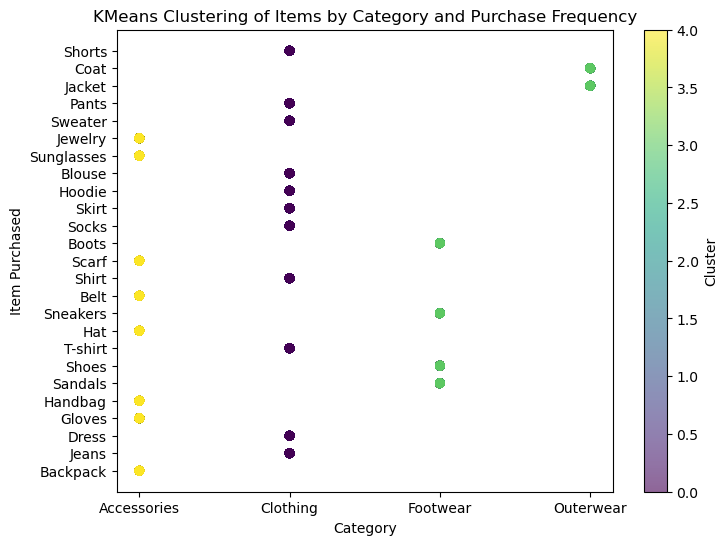

In [9]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    cluster_df['Category'],
    cluster_df['Item Purchased'],
    c=cluster_df['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Category')
plt.ylabel('Item Purchased')
plt.title('KMeans Clustering of Items by Category and Purchase Frequency')
plt.colorbar(scatter, label='Cluster')
plt.show()

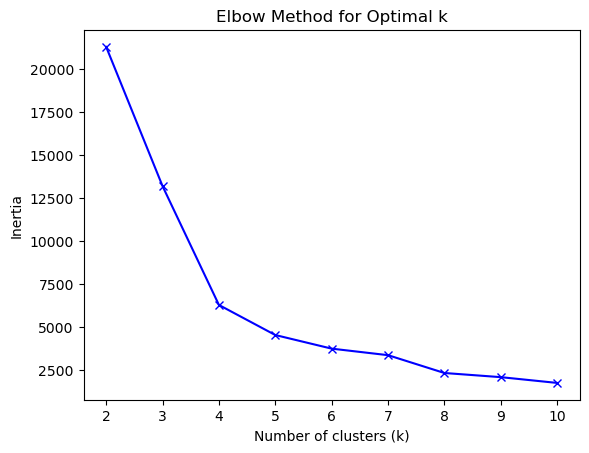

In [10]:
import matplotlib.pyplot as plt

inertia_values = []
K = range(2, 11)  # Test k fimport matplotlib.pyplot as plt

inertia_values = []
K = range(2, 11)  # Test k from 2 to 10
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Apriori - Associate Rules

In [11]:
from sklearn.metrics import silhouette_score
# After fitting KMeans
inertia = kmeans.inertia_
silhouette = silhouette_score(cluster_df, kmeans.labels_)
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

ValueError: could not convert string to float: 'Male'

### Association Rule Mining - apriori algo

In [ ]:
# Association Rule Mining
# Prepare data for Apriori
from apyori import apriori
apriori_df = df[['Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                 'Discount Applied', 'Promo Code Used', 'Purchase Intent Category', 'Frequency of Purchases']].astype(str)

